<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Visualización y limpieza con Pandas

Visualización de los datos del dataset iris\
v1.1

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/iris_dataset.png" width="1000" align="center"></a>

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from  sklearn import  datasets

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
iris=datasets.load_iris()
df_data = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df_target = pd.DataFrame(data= iris.target, columns= ['species'])
print(df_data.head())
print(df_target.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   species
0        0
1        0
2        0
3        0
4        0


In [3]:
# Generar una copia de df_target llamada "df_target_categorical" en el cual se almacenará los tipos de iris como variables categóricas (texto)
df_target_categorical = df_target.copy()

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [4]:
# Alumno: Utilizar apply y lambda expresion sobre df_target para modificar la columna "species" de df_target_categorical
# la lambda debe devolver:
# setosa --> si species = 0
# versicolor --> si species = 1
# virginica --> si species = 2

# Tip:
# df_target_categorical['species'] = df_target.apply(lambda......

# Mapeo las especies
especies = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Aplico la función lambda para mapear los valores de species a las etiquetas
df_target_categorical['species'] = df_target['species'].apply(lambda x: especies[x])


In [5]:
# Alumno: Observar las primeras filas del nuevo df_target_categorical para corroborar que haya sido correcto el cambio
df_target_categorical.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [13]:
# Alumno: Contar cuantas especies de iris hay de cada una en el dataset df_target_categorical
conteo_especies = df_target_categorical['species'].value_counts()
conteo_especies

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
# Concatenar ambos dataset
df = pd.concat([df_data, df_target_categorical], axis= 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
# Alumno: Analice si hay elementos incompletos en el dataset "df_data"

elementos_incompletos = df_data.isnull().sum()
elementos_incompletos


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [9]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
# print(....)
num_filas = df_data.shape[0]
print(num_filas)

150


# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

In [15]:
# Alumno, separe el dataset "df" en un dataset por tipo de iris
# df_setosa = ...
# df_versicolor = ...
# df_verginica = ...
df_setosa = df.loc[df['species'] == 'setosa']
df_versicolor = df.loc[df['species'] == 'versicolor']
df_virginica = df.loc[df['species'] == 'virginica']

In [16]:
# Almuno: Realizar una función que reciba un dataframe como parámetro y grafique
# la relación (scatter plot) entre "petal length (cm)" (x) y "petal width (cm)" (y) de la especie setosa

def graficar_relacion(df_especie):
    plt.scatter(df_especie['petal length (cm)'], df_especie['petal width (cm)'])
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title('Relación entre Petal Length y Petal Width para la especie ' + df_especie['species'].iloc[0])
    plt.show()

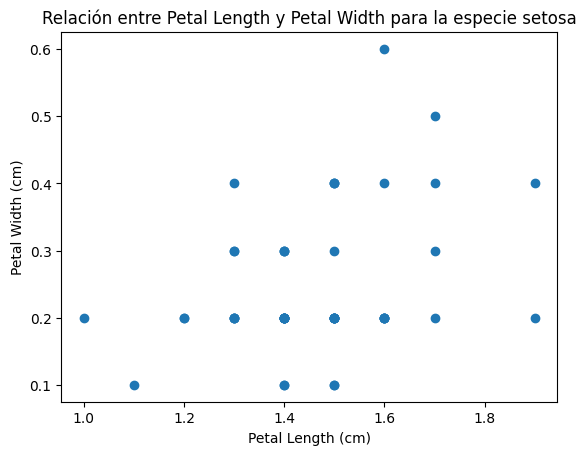

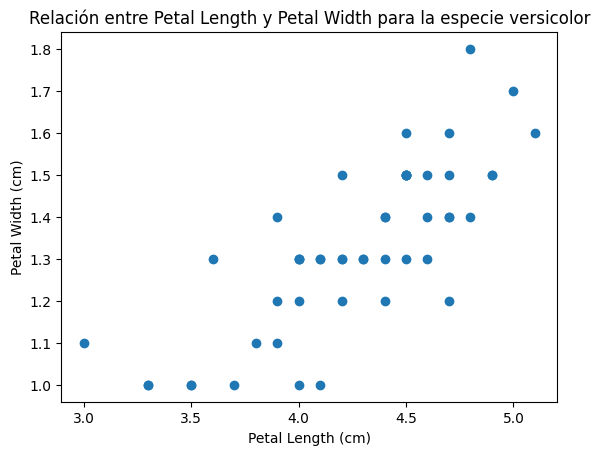

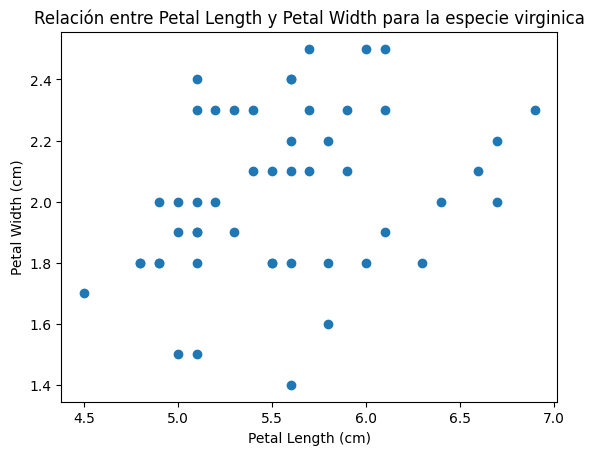

In [17]:
# Almuno: Utilizar la función generada para graficar la relación con dada dataframe de cada especie
graficar_relacion(df_setosa)
graficar_relacion(df_versicolor)
graficar_relacion(df_virginica)